# Project analyzed sales (mini project)

- Analyzing Sales Data  

Author: Naphaphon Phayakkapes

In [15]:
# import data
import numpy as np
import pandas as pd
df = pd.read_csv("sample-store.csv")

In [16]:
 # preview top 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,6/12/2019,6/16/2019,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [17]:
# shape of dataframe
df.shape

(9994, 21)

In [18]:
# see data frame information using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

We can use `pd.to_datetime()` function to convert columns 'Order Date' and 'Ship Date' to datetime.


In [19]:
# example of pd.to_datetime() function
pd.to_datetime(df['Order Date'].head(), format='%m/%d/%Y')
pd.to_datetime(df['Ship Date'].head(), format='%m/%d/%Y')

,Ship Date
0,2019-11-11
1,2019-11-11
2,2019-06-16
3,2018-10-18
4,2018-10-18


In [20]:
# TODO - convert order date and ship date to datetime in the original dataframe
df['Order Date']  = pd.to_datetime(df['Order Date'], format = '%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2017-110422,2017-01-21,2017-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [21]:
# TODO - count nan in postal code column
count_nan = df['Postal Code'].isna().sum()
print(f"Number of missing values in 'Postal Code' column: {count_nan}")

Number of missing values in 'Postal Code' column: 11


In [22]:
# TODO - filter rows with missing values
df_filter = df.dropna()
df_filter

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2017-110422,2017-01-21,2017-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2020-121258,2020-02-26,2020-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [23]:
# TODO - Explore this dataset on your owns, ask your own questions
    # how many order each city and segment
df_filter.groupby(['City', 'Segment']).size().reset_index(name = 'count')

,City,Segment,count
0,Aberdeen,Consumer,1
1,Abilene,Consumer,1
2,Akron,Consumer,13
3,Akron,Corporate,6
4,Akron,Home Office,2
...,...,...,...
1021,Yonkers,Home Office,2
1022,York,Corporate,5
1023,Yucaipa,Corporate,1
1024,Yuma,Corporate,2


## Data Analysis Part
Answer 10 below questions to get credit from this course. Write pandas code to find answers.

In [24]:
# TODO 01 - how many columns, rows in this dataset
df.shape

(9994, 21)

In [25]:
 #TODO 02 - is there any missing values?, if there is, which colunm? how many nan values?
df.info()
# Postal Code - missing 11 values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [26]:
# TODO 03 - your friend ask for `California` data, filter it and export csv for him
df_california = df[df['State'] == 'California']
df_california.to_csv('california_data.csv')


In [27]:
# TODO 04 - your friend ask for all order data in `California` and `Texas` in 2017 (look at Order Date), send him csv file

    # Filter order data for California and Texas in 2017
CA_TX_DF = df[
    (df['State'].isin(['California', 'Texas'])) &
    (df['Order Date'] >= pd.Timestamp('2017-01-01')) &
    (df['Order Date'] <= pd.Timestamp('2017-12-31'))
].dropna()

    # Export the filtered result to a CSV file
CA_TX_DF.to_csv("ca_tx_all_order_2017.csv")



In [28]:
# TODO 05 - how much total sales, average sales, and standard deviation of sales your company make in 2017

    # filter data for 1027
sales_2017 = df[
                (df ['Order Date'] >= pd.Timestamp('2017-01-01')) &
                (df ['Order Date'] <= pd.Timestamp('2017-12-31'))
].dropna()

    #calculate total, averaage and standard devition of sales
import numpy as np
print (f"Total sales in 2017: {np.sum(sales_2017['Sales']):.2f}")
print (f"Average sales in 2017: {np.mean(sales_2017['Sales']):.2f}")
print (f"Standard deviation of sales in 2017: {np.std(sales_2017['Sales']):.2f}")


Total sales in 2017: 484247.50
Average sales in 2017: 242.97
Standard deviation of sales in 2017: 753.86


In [29]:
# TODO 06 - which Segment has the highest profit in 2018

    #filter data for 2018
data_2018 = df[
    (df['Order Date'] >= pd.Timestamp('2018-01-01') )  &
    (df['Order Date'] <= pd.Timestamp('2018-12-31') )
].dropna()

    #group by Segment and calculate total profit
segment_profit = data_2018.groupby('Segment')['Profit'].sum()

    #find the segment with highest profit
highest_profit_segmant = segment_profit.idxmax()
highest_profit_value = segment_profit.max()

print(f"The segment with the highest profit in 2018 is ' {highest_profit_segmant} with a profit of {highest_profit_value:.2f}")

The segment with the highest profit in 2018 is ' Consumer with a profit of 28281.37


In [30]:
# TODO 07 - which top 5 States have the least total sales between 15 April 2019 - 31 December 2019

    #filter data between 15 April 2019 - 31 December 2019
filter_date  = df[
    (df['Order Date'] >= pd.Timestamp('2019-04-15')) &
    (df['Order Date'] <= pd.Timestamp('2019-12-31'))
].dropna()

    # Group  by 'State ' and calculate to total sales
state_sales = filter_date.groupby('State')['Sales'].sum()

    # Sort the states by total sales in ascending order
least_sales_states = state_sales.sort_values(ascending=True).head()

print( f"Top 5 States with the least total sales between 15 April 2019 - 31 December 2019 : {least_sales_states}")

Top 5 States with the least total sales between 15 April 2019 - 31 December 2019 : State
New Hampshire            49.05
New Mexico               64.08
District of Columbia    117.07
Louisiana               249.80
South Carolina          502.48
Name: Sales, dtype: float64


In [31]:
# TODO 08 - what is the proportion of total sales (%) in West + Central in 2019 e.g. 25%

    #  filter data in 2019
sales_2019 = df[
    (df['Order Date'] >= pd.Timestamp('2019-01-01')) &
    (df['Order Date'] <= pd.Timestamp('2019-12-31'))
].dropna()

    # calculate  total overall in 2019
total_sales = np.sum(sales_2019['Sales'])


    # filter for 'west' and 'central in 2019'
df_west_central = sales_2019[
    (sales_2019['Region'] == 'West') |
    (sales_2019['Region'] == 'Central')
].dropna()

    # calculate total sales  for 'West' and 'Central'
df_west_central_sales = np.sum(df_west_central['Sales'])


    #  calculate the proportion of sales and print  it
proportion = round((df_west_central_sales /  total_sales) *100, 2)

print(f"The proportion of total sales in West + Central in 2019 is {proportion}%.")




The proportion of total sales in West + Central in 2019 is 55.24%.


In [32]:
# TODO 09 - find top 10 popular products in terms of number of orders
#           vs. total sales during 2019-2020

    #filter dataset for year in 2019-2020
filter_2019_2020 = df[
    (df['Order Date'] >= pd.Timestamp('2019-01-01') ) &
    (df['Order Date'] <= pd.Timestamp('2020-12-31') )
].dropna()

    #  group by 'Product Name' and calculte total sales and number of orders
result = filter_2019_2020.groupby('Product Name').\
         agg(total_sales = ('Sales', 'sum'),number_of_order = ('Order ID', 'count'))

    # sort the result  by total  sales in descending orders
result_sorted_by_sales = result.sort_values(by='total_sales', ascending=False)

    #sort the resu lts  b y number_of_order in  descending  order
result_sorted_by_order = result.sort_values(by = 'number_of_order', ascending = False  )


    #display the top 10 popular products
print("Top 10 popular products in terms of number of sales:")
print(result_sorted_by_sales.head(10))

print("\nTop 10 popular products in terms of total orders :")
print(result_sorted_by_order.head(10))


Top 10 popular products in terms of number of sales:
                                                    total_sales  \
Product Name                                                      
Canon imageCLASS 2200 Advanced Copier                 61599.824   
Hewlett Packard LaserJet 3310 Copier                  16079.732   
3D Systems Cube Printer, 2nd Generation, Magenta      14299.890   
GBC Ibimaster 500 Manual ProClick Binding System      13621.542   
GBC DocuBind TL300 Electric Binding System            12737.258   
GBC DocuBind P400 Electric Binding System             12521.108   
Samsung Galaxy Mega 6.3                               12263.708   
HON 5400 Series Task Chairs for Big and Tall          11846.562   
Martin Yale Chadless Opener Electric Letter Opener    11825.902   
Global Troy Executive Leather Low-Back Tilter         10169.894   

                                                    number_of_order  
Product Name                                                         
Ca

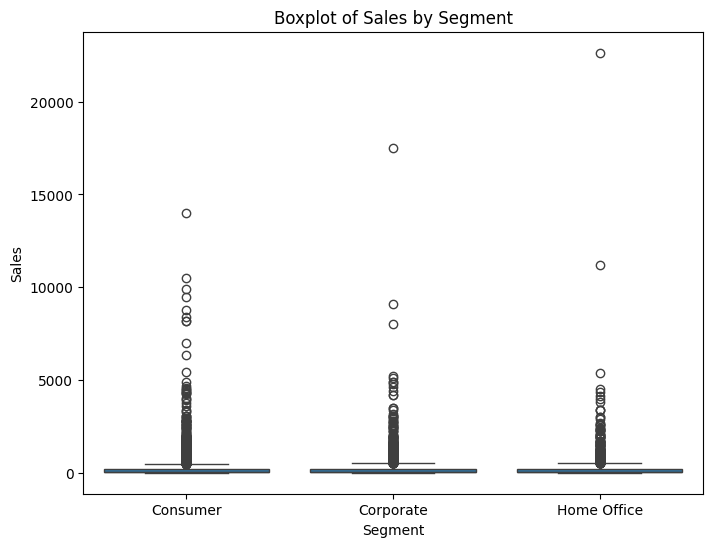

In [33]:
# TODO 10 - plot at least 2 plots, any plot you think interesting :)

## ---------- 1st plot ---------- ##

import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for Sales across different Segments
plt.figure(figsize=(8, 6))
sns.boxplot(x='Segment', y='Sales', data=df)
plt.title("Boxplot of Sales by Segment")
plt.xlabel("Segment")
plt.ylabel("Sales")
plt.show()

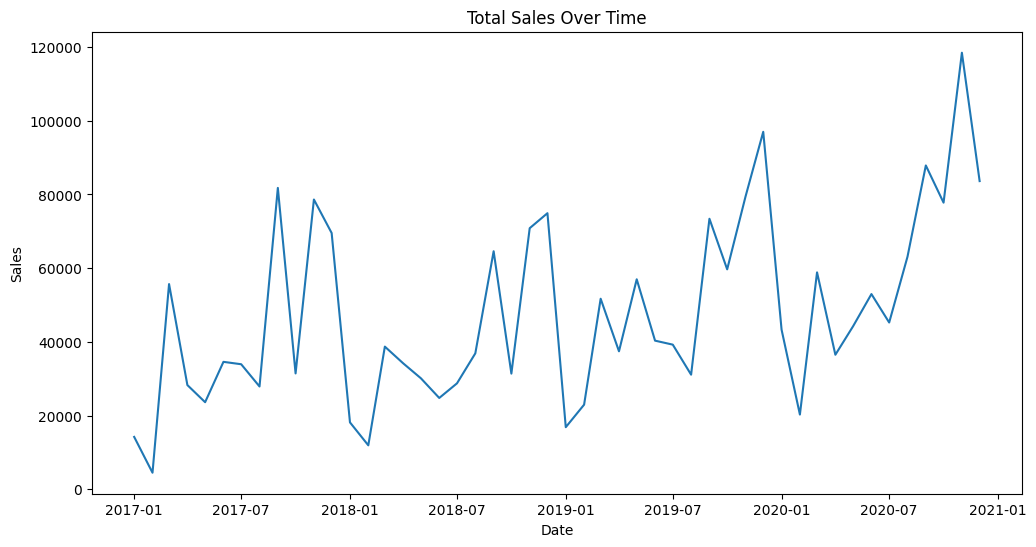

In [38]:
## ---------- 2nd plot ---------- ##

df_clean =  df.dropna().copy()

  #check 'Order date' is a datetime format. If not, convert it back to datetime format .
if df_clean['Order Date'].dtype != np.dtype('datetime64[ns]'):
    df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'], format='%m/%d/%Y')

  # create a new column for year and month
df_clean['YearMonth'] = df_clean['Order Date'].dt.to_period('M')

  #group by the new 'YearMonth' column and sum sales
df_sales_month = df_clean.groupby('YearMonth')['Sales'].sum().reset_index()

  #convert 'YearMonth' back to datetime for plotting
df_sales_month['YearMonth'] = df_sales_month['YearMonth'].dt.to_timestamp()

  #create the line plot
plt.figure(figsize=(12, 6))
plt.plot(df_sales_month['YearMonth'], df_sales_month['Sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Total Sales Over Time')
plt.show()

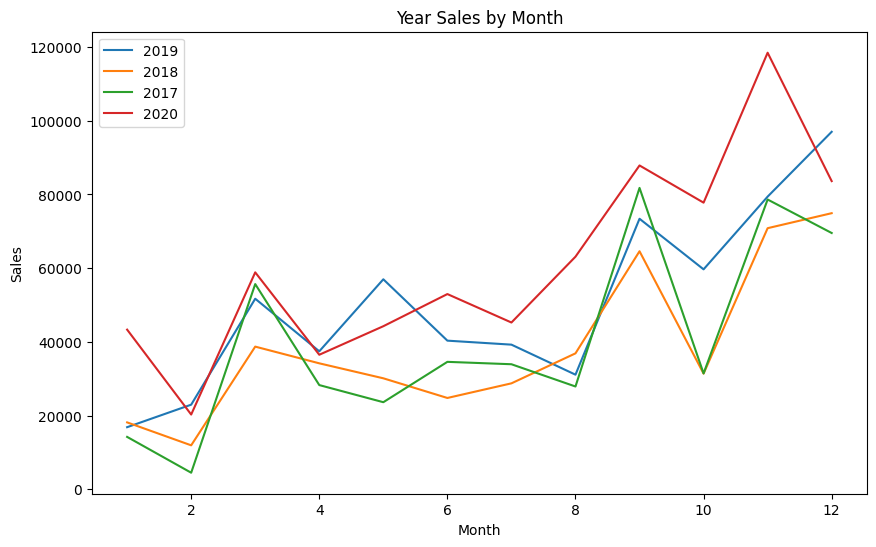

In [37]:
## ---------- 3rd plot ---------- ##


df_clean = df.copy().dropna()
# check 'Order Date' is in datetime format. If not, convert it back to datetime format.
if df_clean['Order Date'].dtype != np.dtype('datetime64[ns]'):
    df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'], format='%m/%d/%Y')


# create a new column for year and month
df_clean['YearMonth'] = df_clean['Order Date'].dt.to_period('M')
df_clean['Year'] = df_clean['Order Date'].dt.year
df_clean['Month'] = df_clean['Order Date'].dt.month

# group by the new 'YearMonth' column and sum sales
df_sale_month = df_clean.groupby([ 'Year', 'Month' ]).agg({'Sales': 'sum'}).reset_index()
df_sale_month['YearMonth'] = df_sale_month[ 'Year' ].astype(str) + "-" + df_sale_month[ 'Month' ].astype(str)

# create the line plot
plt.figure(figsize=(10, 6))
for year in df_clean['Year'].unique():
    year_data = df_sale_month[df_sale_month['Year'] == year]
    plt.plot(year_data['Month'], year_data['Sales'], label=year)

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Year Sales by Month')
plt.legend()
plt.show()